In [44]:
import pandas as pd

In [45]:
customer_df = pd.read_csv('Mall_Customers.csv')
print(customer_df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


Annual Income (k$)
- 고객의 연간 소득을 1,000달러 단위로 나타낸 값
  예를 들어, 값이 15라면 해당 고객의 연간 소득은 15,000달러를 의미
- 고소득과 저소득 고객을 구분하여 다른 마케팅 전략을 수립하는 데 유용

Spending Score (1-100)
- 쇼핑몰에서 고객의 소비 성향을 1에서 100 사이의 점수로 나타낸 값
  점수가 높을수록 고객의 소비가 활발하거나 구매 가능성이 높음을 의미
- 소비 성향이 높은 고객(고득점)과 낮은 고객(저득점)을 구분하여 마케팅 캠페인을 타겟팅할 수 있다

In [46]:
print(customer_df.isnull().sum()) #결측값 확인

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


데이터프레임화가 필요한 이유
- **가독성**
표준화된 data를 Numpy배열로 유지하면 변수 이름이 없어서 어떤 값이 변수인지 알기 어렵다.
- **data 병합**
기존의 DataFrame과 표준화된 Data를 병합하거나, 기존 DataFrame을 대체하려면 데이터프레임화가 유용하다.
- **분석 편의성**
DataFrame은 Pandas의 다양한 기능(ex:필터링, 집계, 시각화)을 활용할 수 있어 작업이 편리하다.

In [47]:
# z-score기반 이상치 탐지
from scipy.stats import zscore

# Z-Score 계산
z_scores = zscore(customer_df[['Annual Income (k$)', 'Spending Score (1-100)']])

# 이상치 탐지
customer_df_cleaned = customer_df[(abs(z_scores) < 3).all(axis=1)]

In [48]:
# 이상치 필터링 (Z-Score 절대값이 3 이상인 데이터를 이상치로 간주)
outliers = customer_df[(abs(z_scores) >= 3).any(axis=1)]

# 이상치 데이터 출력
print(outliers)

Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


In [49]:
# 이상치 탐지
customer_df_cleaned = customer_df[(abs(z_scores) < 2.5).all(axis=1)]
# 이상치 필터링 (Z-Score 절대값이 2.5 이상인 데이터를 이상치로 간주)
outliers = customer_df[(abs(z_scores) >= 2.5).any(axis=1)]
# 이상치 데이터 출력
print(outliers)

     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83


In [50]:
# 해당되는 두개의 data 이상치 제거
customer_df_cleaned = customer_df[(abs(z_scores) < 2.5).all(axis=1)]

In [51]:
# 표준화 선택
from sklearn.preprocessing import StandardScaler
# StandardScaler 객체 생성
scaler = StandardScaler()
# 데이터 표준화 
scaled_data = scaler.fit_transform(customer_df_cleaned[['Annual Income (k$)', 'Spending Score (1-100)']])

In [52]:
# 표준화된 데이터 데이터프레임으로 변환
standardized_df = pd.DataFrame(scaled_data, columns=['Annual Income (k$)_standardized', 'Spending Score (1-100)_standardized'])

In [53]:
from sklearn.cluster import KMeans  # scikit-learn 라이브러리의 KMeans클래스 불러오기
import matplotlib.pyplot as plt  # Matplotlib : 데이터 시각화를 위한 파이썬 라이브러리로, 그래프와 플롯을 생성. pyplot모듈, 간단한 함수 호출로 그래프를 빠르게 그릴 수 있도록 도와줌

In [54]:
# Elbow Method를 사용하여 K-Means 클러스터링에서 최적의 클러스터 수를 결정하기 위한 과정
# Elbow Method는 클러스터 수(k)에 따른 WCSS(Within-Cluster Sum of Squares) 값을 시각화하여, 
# WCSS 감소가 급격히 완화되는 지점(엘보)을 최적의 클러스터 수로 선택
inertia = []  
# WCSS 값을 저장할 리스트
# WCSS는 클러스터 내 데이터와 중심점 사이 거리의 제곱합으로, 클러스터링의 "응집도"를 나타냄



for k in range(1, 11):   # 클러스터 수를 1부터 10까지 반복하여 K-Means 모델을 생성하고 데이터를 학습
    kmeans = KMeans(n_clusters=k, random_state=42)   # K-Means 객체 생성, k개의 클러스터로 데이터를 그룹화
    kmeans.fit(standardized_df)  # 데이터 학습
    inertia.append(kmeans.inertia_)  # 클러스터링 후 WCSS 값 저장  # kmeans.inertia_: WCSS 값을 반환하는 속성


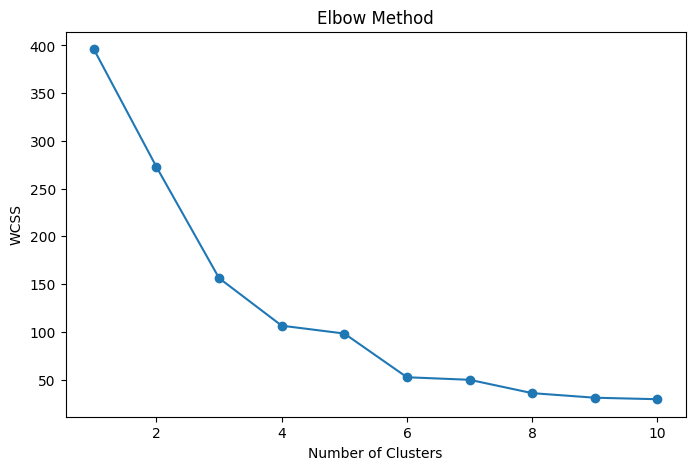

In [55]:
# Elbow Plot 시각화
plt.figure(figsize=(8, 5))                  # 그래프 크기 설정
plt.plot(range(1, 11), inertia, marker='o') # 클러스터 수(k)에 따른 WCSS 값 플롯
plt.title('Elbow Method')                   # 그래프 제목 설정
plt.xlabel('Number of Clusters')            # X축 레이블
plt.ylabel('WCSS')                          # Y축 레이블
plt.show()                                  # 그래프 출력
# 그래프에서 "엘보"(급격한 감소가 완화되는 지점)를 찾아 최적의 클러스터 수를 결정                

3~5 사이의 클러스터에서 감소율이 크게 완화된다. "팔꿈치" 모양 : elbow point
3개의 클러스터로 설정하고 data clustering 시도

In [56]:
# K-Means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)  # 클러스터 수를 3으로 설정
standardized_df['Cluster'] = kmeans.fit_predict(standardized_df)  # 클러스터 레이블 추가


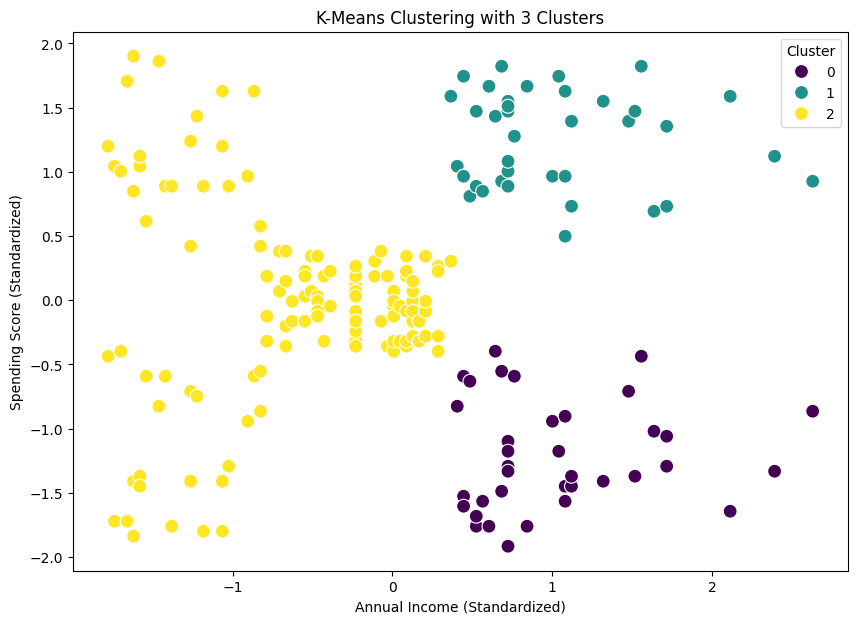

In [57]:
# Seaborn 라이브러리를 불러옴. 
# Seaborn은 Matplotlib 기반의 데이터 시각화 라이브러리로, 더 세련되고 간결한 그래프를 
# 생성할 수 있다
import seaborn as sns

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 7)) # Matplotlib의 figure 크기를 설정
sns.scatterplot(  # Seaborn의 산점도(Scatter Plot)를 생성하는 함수
    x=standardized_df['Annual Income (k$)_standardized'],
    y=standardized_df['Spending Score (1-100)_standardized'],
    hue=standardized_df['Cluster'], # 데이터포인트의 색상을 Cluste)레이블에 따라다르게 설정
    palette='viridis', # 팔레트 색상 지정
    s=100 # s=100은 포인트 크기를 100으로 설정
)
plt.title('K-Means Clustering with 3 Clusters') # 그래프 제목 설정
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)') # X축과 Y축 레이블을 각각 설정
plt.legend(title='Cluster') # 범례 제목을 Cluster로 설정
plt.show() # 그래프를 출력


3개의 클러스터 시각화 결과
0 == 평균기준

- 보라색 클러스터(cluster 0):
평균 보다 낮은 소비 점수와 평균이상 소득 수준의 고객들

- 청록색 클러스터(cluster 1):
평균 보다 높은 소비 점수와 평균이상 소득수준의 고객들

- 노란색 클러스터 (cluster 2)
평균 정도의 소비 점수와 평균 정도의 소득 수준의 고객들

In [58]:
# 클러스터별 요약 통계
cluster_summary = standardized_df.groupby('Cluster').agg(['mean', 'std', 'min', 'max']) # 각 클러스터의 소득 수준과 소비 점수의 평균, 표준편차, 최소값, 최대값을 확인
print(cluster_summary)


        Annual Income (k$)_standardized                                \
                                   mean       std       min       max   
Cluster                                                                 
0                              1.027303  0.562896  0.405670  2.630236   
1                              1.009899  0.565507  0.365946  2.630236   
2                             -0.621028  0.637095 -1.779171  0.365946   

        Spending Score (1-100)_standardized                                
                                       mean       std       min       max  
Cluster                                                                    
0                                 -1.228434  0.430890 -1.915640 -0.397051  
1                                  1.242450  0.369487  0.498526  1.822424  
2                                 -0.014318  0.766858 -1.837763  1.900300  


In [59]:
# 클러스터별 데이터 포인트 개수
cluster_counts = standardized_df['Cluster'].value_counts()
print(cluster_counts)
# cluster 2가 가장 크다. 고객관리와 마케팅 전략에서 주요 타겟이 될 수 있음

Cluster
2    123
1     38
0     37
Name: count, dtype: int64


In [60]:
from sklearn.metrics import silhouette_score

# 실루엣 점수 계산
sil_score = silhouette_score(standardized_df.drop('Cluster', axis=1), standardized_df['Cluster'])
print("Silhouette Score:", sil_score)

# 실루엣점수
# 점수 범위: -1에서 1 사이의 값
# 1에 가까울수록: 클러스터 간 분리가 명확하며, 클러스터링 품질이 좋음을 의미
# 0에 가까울수록: 클러스터 간 경계가 모호하며, 클러스터가 잘 구분되지 않았음을 의미
# 음수: 데이터 포인트가 잘못된 클러스터에 할당되었을 가능성을 의미

Silhouette Score: 0.4667041091037676


In [61]:
# K-Means 클러스터링
kmeans = KMeans(n_clusters=5, random_state=42)  # 클러스터 수를 5로 설정
standardized_df['Cluster'] = kmeans.fit_predict(standardized_df) 


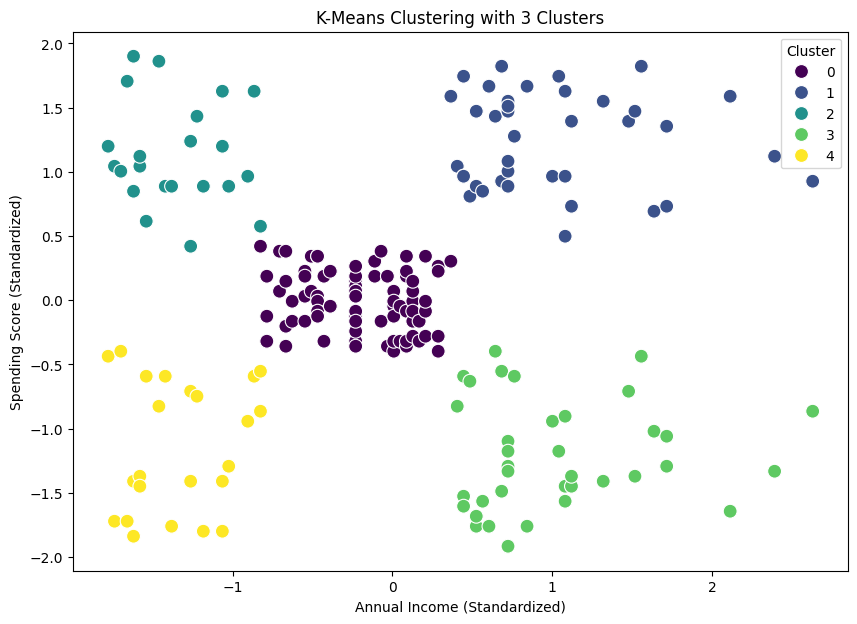

In [62]:
plt.figure(figsize=(10, 7)) # Matplotlib의 figure 크기를 설정
sns.scatterplot(  # Seaborn의 산점도(Scatter Plot)를 생성하는 함수
    x=standardized_df['Annual Income (k$)_standardized'],
    y=standardized_df['Spending Score (1-100)_standardized'],
    hue=standardized_df['Cluster'], # 데이터포인트의 색상을 Cluste)레이블에 따라다르게 설정
    palette='viridis', # 팔레트 색상 지정
    s=100 # s=100은 포인트 크기를 100으로 설정
)
plt.title('K-Means Clustering with 3 Clusters') # 그래프 제목 설정
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)') # X축과 Y축 레이블을 각각 설정
plt.legend(title='Cluster') # 범례 제목을 Cluster로 설정
plt.show() # 그래프를 출력


5개의 클러스터 시각화 결과
0 == 평균기준

- 보라색 클러스터(cluster 0):
평균적인 소비 점수와 평균적인 소득의 수준의 고객들

- 파란색 클러스터(cluster 1):
높은 소비 점수와 높은 소득 수준의 고객들

- 청록색 클러스터(cluster 2):
높은 소비 점수와 평균 이하의 소득 수준의 고객들

- 연두색 클러스터(cluster 3):
평균 이하의 소비 점수와 평균 이상의 소득 수준의 고객들

- 노란색 클러스터(cluster 4):
평균 이하의 소비 점수와 평균 이하의 소득 수준의 고객들


In [63]:
# 클러스터별 데이터 포인트 개수
cluster_counts = standardized_df['Cluster'].value_counts()
print(cluster_counts)

Cluster
0    78
1    38
3    37
4    23
2    22
Name: count, dtype: int64


In [64]:
# 실루엣 점수 계산
sil_score = silhouette_score(standardized_df.drop('Cluster', axis=1), standardized_df['Cluster'])
print("Silhouette Score:", sil_score)

Silhouette Score: 0.5586172665262851


클러스터 3개일때의 실루엣 점수 : 0.4667041091037676
클러스터 5개일때의 실루엣 점수 : 0.5586172665262851

의미 : 
- 클러스터 간의 경계가 더 명확해졌으며, 클러스터링 품질이 개선되었음을 나타냄.
- 데이터가 5개의 클러스터로 분리되었을 때, 클러스터 내부 데이터는 더 응집되어 있고, 클러스터 간 데이터는 더 분리되었다는 것을 의미
- 데이터가 3개 클러스터로 나뉘었을 때보다, 5개 클러스터로 나뉘면서 더 세밀한 고객 세그먼트를 정의할 수 있음

In [65]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster # 계층적 군집화 수행을 위해 덴드로그램 불러오기

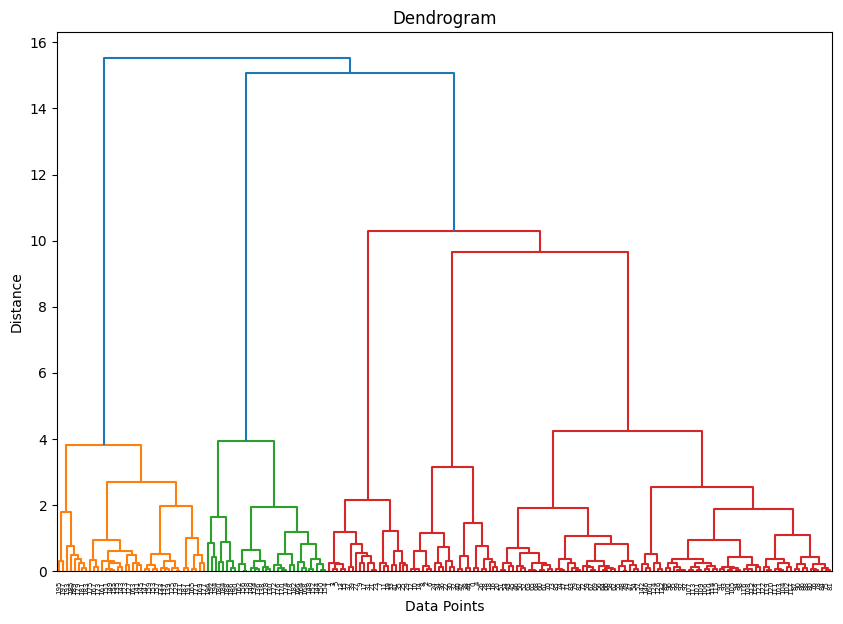

In [66]:
# 덴드로그램 생성. 데이터를 링크 방식으로 변환 
linked = linkage(standardized_df.drop('Cluster', axis=1, errors='ignore'), method='ward')

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

드로그램의 구성
X축 (Data Points):
- 각 데이터 포인트는 처음에 독립적인 클러스터로 시작

Y축 (Distance):
- 클러스터 간의 병합 거리(유사도 또는 거리)를 나타냄
- 값이 클수록 병합된 클러스터 간의 거리가 멀고, 값이 작을수록 병합된 클러스터가 
  유사하다는 의미

  
수평선과 수직선:
- 수직선: 데이터 포인트 또는 클러스터가 병합되는 순간을 나타냄
- 수평선: 병합된 클러스터 간의 거리(유사도)를 나타냄
- Y축 상단으로 갈수록 클러스터 간의 유사도가 낮아지고, 병합 거리가 멀어짐

덴드로그램 해석
1. 클러스터 수 결정:
    - 덴드로그램에서 클러스터 수를 결정하려면 Y축에서 급격히 증가하는 병합 거리를 기준으로 선택
    - Y축 값이 약 10 근처에서 큰 간격(파란색, 초록색, 빨간색)의 클러스터가 형성되므로, 
      3개의 클러스터로 나누는 것이 합리적일 수 있음
    - Y축 값이 4~5 사이에서 또 다른 주요 병합이 발생하므로, 4~5개의 클러스터로 나눌 수도 있음

2. 클러스터 내 응집도:
    - Y축 값이 낮은 영역에서 병합된 클러스터는 데이터 포인트 간 유사도가 높아 
      응집도가 높음을 의미
    - Y축 값이 높은 영역에서 병합된 클러스터는 데이터 간 유사도가 낮고, 
      더 넓은 범위의 데이터를 포함

결론: 3개의 클러스터 혹은 4~5개의 클러스터 선택

In [67]:
from scipy.cluster.hierarchy import fcluster # fcluster를 사용해 4개의 클러스터로 데이터 분류
n_clusters = 5  
standardized_df['Cluster_HC'] = fcluster(linked, n_clusters, criterion='maxclust')

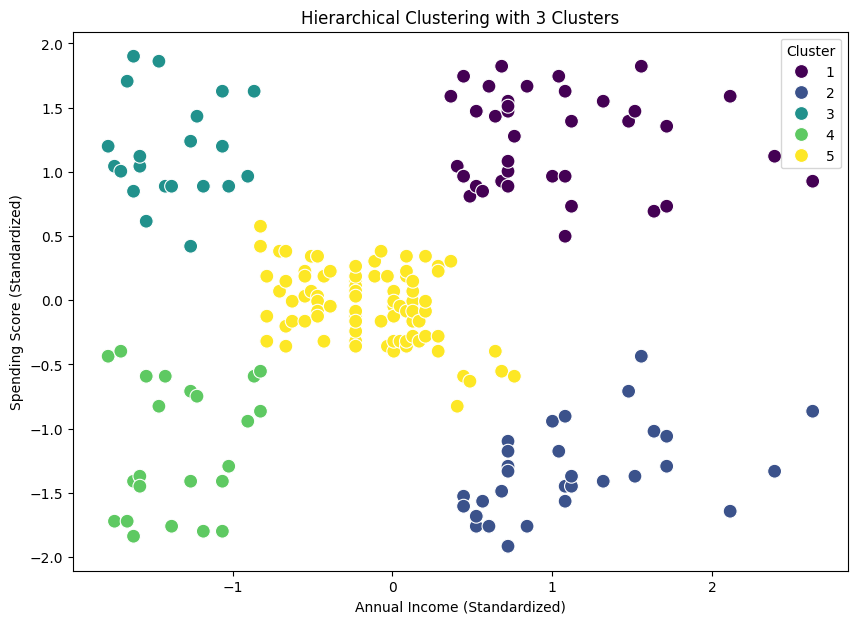

In [68]:
# 클러스터링 결과를 산점도로 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=standardized_df['Annual Income (k$)_standardized'],
    y=standardized_df['Spending Score (1-100)_standardized'],
    hue=standardized_df['Cluster_HC'],
    palette='viridis',
    s=100
)
plt.title('Hierarchical Clustering with 3 Clusters')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.legend(title='Cluster')
plt.show()

In [69]:
# 계층적 군집화 결과에 대한 실루엣 점수 계산
hc_silhouette_score = silhouette_score(
    standardized_df.drop(columns=['Cluster_HC'], errors='ignore'),  # 데이터에서 클러스터 컬럼 제외
    standardized_df['Cluster_HC']  # 계층적 군집화 결과 클러스터 레이블
)

print(f"Silhouette Score (Hierarchical Clustering): {hc_silhouette_score:.4f}")

Silhouette Score (Hierarchical Clustering): 0.6230


In [70]:
from sklearn.cluster import DBSCAN # DBSCAN 알고리즘

In [71]:
# DBSCAN 모델 생성 및 실행
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps와 min_samples는 데이터에 맞게 조정, 이 설정은 일반적으로 밀도가 고르게 분포된 데이터셋에서 잘 작동
labels = dbscan.fit_predict(standardized_df)  # 이미 전처리된 데이터 사용

# 결과 확인
print("클러스터 레이블:", set(labels))  # 레이블 종류
# 결과 6개의 클러스터와 1개의 -1 노이즈 포인트

클러스터 레이블: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(-1)}


In [72]:
standardized_df['Cluster_DBSCAN'] = labels
print(standardized_df.head())


   Annual Income (k$)_standardized  Spending Score (1-100)_standardized  \
0                        -1.779171                            -0.435989   
1                        -1.779171                             1.199413   
2                        -1.739447                            -1.720949   
3                        -1.739447                             1.043661   
4                        -1.699723                            -0.397051   

   Cluster  Cluster_HC  Cluster_DBSCAN  
0        4           4               1  
1        2           3               0  
2        4           4               1  
3        2           3               0  
4        4           4               1  


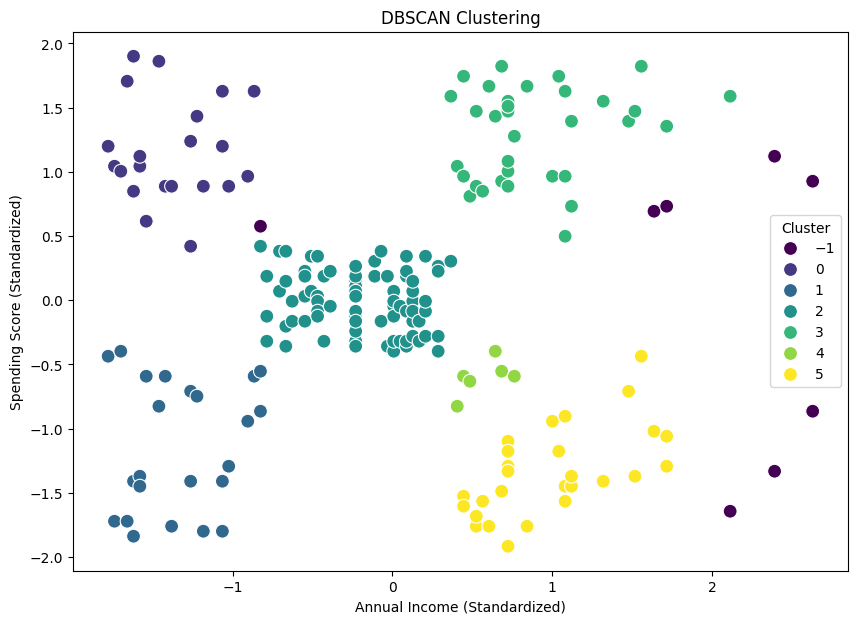

In [73]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=standardized_df['Annual Income (k$)_standardized'],
    y=standardized_df['Spending Score (1-100)_standardized'],
    hue=standardized_df['Cluster_DBSCAN'],
    palette='viridis',
    s=100
)
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.legend(title='Cluster')
plt.show()


In [74]:
# 노이즈 포인트(-1) 제거 후 실루엣 점수 계산
non_noise_data = standardized_df[standardized_df['Cluster_DBSCAN'] != -1]
silhouette = silhouette_score(
    non_noise_data[['Annual Income (k$)_standardized', 'Spending Score (1-100)_standardized']],
    non_noise_data['Cluster_DBSCAN']
)
print(f"Silhouette Score (DBSCAN): {silhouette:.4f}")


Silhouette Score (DBSCAN): 0.4744


K-means(cluster 5개) : 0.5586172665262851

계층적 군집화 : 0.6230

DBSCAN : 0.4744

계층적 군집화가 다른 두 알고리즘(K-Means, DBSCAN)에 비해 클러스터링 품질이 더 좋다는 것을 의미